In [1]:
from langsmith import Client, traceable
from langchain_core.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI
from langchain_core.messages import AIMessage
from langchain_community.llms.fake import FakeListLLM
from langchain import hub
from langsmith.wrappers import wrap_openai
from langsmith.evaluation import evaluate, evaluate_existing
from langsmith.schemas import Example, Run
from dotenv import load_dotenv
import pandas as pd
import os

load_dotenv("../.env.secret")
# load_dotenv("../.env")

True

In [18]:
client = Client()
prompt = "Simulate a probability distribution. Output 'A' with 0.5 probability, 'B' with 0.3 probability, and 'C' with 0.2 probability."
chat_model = ChatOpenAI(
    model="gpt-4-turbo",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)
output_parser = StrOutputParser()

In [19]:
messages = [
    (
        "human",
        "You will output labels STRICTLY according to a probability distribution. Output the next label according to the following distribution: A -> 0.5, B -> 0.3, C -> 0.2. You will only output one label at a time. Make sure all labels are represented in the outputs. Don't output anything else.",
    ),
]
labels = []
for i in range(100):
    ai_msg = chat_model.invoke(messages)
    print(ai_msg.content)
    labels.append(ai_msg.content)

A
B
A
A
B
B
A
B
A
B
A
A
A
B
A
B
B
B
A
B
A
A
B
B
B
B
B
B
B
B
B
B
B
A
B
B
B
B
B
B
A
B
B
B
B
B
B
A
B
B
B
B
B
A
B
A
B
B
A
B
A
B
B
B
A
A
A
A
B
B
A
B
B
B
B
A
B
B
B
B
B
A
B
B
B
B
B
B
B
A
B
A
B
A
B
B
A
A
B
B


In [20]:
labels

['A',
 'B',
 'A',
 'A',
 'B',
 'B',
 'A',
 'B',
 'A',
 'B',
 'A',
 'A',
 'A',
 'B',
 'A',
 'B',
 'B',
 'B',
 'A',
 'B',
 'A',
 'A',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'A',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'A',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'A',
 'B',
 'B',
 'B',
 'B',
 'B',
 'A',
 'B',
 'A',
 'B',
 'B',
 'A',
 'B',
 'A',
 'B',
 'B',
 'B',
 'A',
 'A',
 'A',
 'A',
 'B',
 'B',
 'A',
 'B',
 'B',
 'B',
 'B',
 'A',
 'B',
 'B',
 'B',
 'B',
 'B',
 'A',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'A',
 'B',
 'A',
 'B',
 'A',
 'B',
 'B',
 'A',
 'A',
 'B',
 'B']

In [21]:
!pwd

/Users/amogh.mannekote/classroom/notebooks


In [22]:
# Count number of times each label was output
df = pd.DataFrame(labels, columns=["label"])
df["label"].value_counts(normalize=True)


label
B    0.69
A    0.31
Name: proportion, dtype: float64

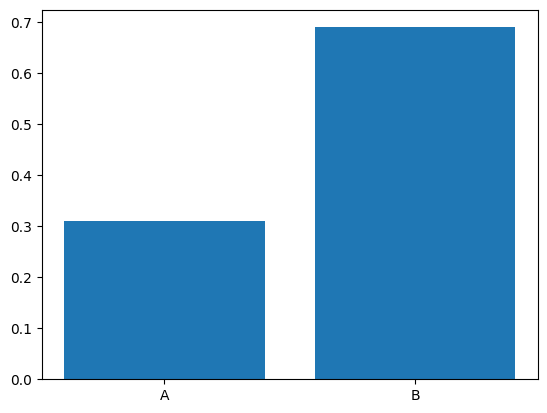

In [23]:
# Plot histogram of labels as probability distribution and not as frequency or counts
import matplotlib.pyplot as plt
import numpy as np

unique, counts = np.unique(labels, return_counts=True)
plt.bar(unique, counts/len(labels))
plt.show()
